In [2]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])

In [4]:
! mamba install pandas==1.3.3
! mamba install numpy==1.21.2

<class 'AttributeError'>: module 'pexpect' has no attribute 'TIMEOUT'

In [5]:
import pandas as pd
import matplotlib.pylab as plt

In [25]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [29]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [30]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [37]:
await download(filename,'auto.csv')
filename = 'auto.csv'

In [38]:
df = pd.read_csv(filename, names = headers)

In [39]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [40]:
import numpy as np

df.replace('?',np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [47]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print('')

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [52]:
#Calculate the mean value for the "normalized-losses" column 

avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
print('Average of normalized-losses:', avg_norm_loss)

Average of normalized-losses: 122.0


In [53]:
#Replace "NaN" with mean value in "normalized-losses" column

df['normalized-losses'].replace(np.NaN,avg_norm_loss, inplace=True)



In [54]:
#Calculate the mean value for the "bore" column

avg_bore = df['bore'].astype('float').mean(axis=0)
print('Average of bore:', avg_bore)

Average of bore: 3.3297512437810943


In [55]:
#Replace "NaN" with the mean value in the "bore" column

df['bore'].replace(np.NaN, avg_bore, inplace=True)


## QUESTION #1

In [56]:
# replace NaN in 'stroke' column with hte mean value

avg_stroke = df['stroke'].astype('float').mean(axis=0)
print('Average of Stroke:', avg_stroke)

Average of Stroke: 3.255422885572139


In [57]:
df['stroke'].replace(np.NaN, avg_stroke, inplace = True)

In [59]:
# Calculate the mean value for the "horsepower" column

avg_horsepower = df['horsepower'].astype('float').mean (axis=0)
print('average of horsepower;', avg_horsepower)

average of horsepower; 104.25615763546799


In [60]:
df['horsepower'].replace(np.NaN, avg_horsepower, inplace=True)

In [67]:
# Calculate the average for the 'peak-rpm' column

avg_peakrpm = df['peak-rpm'].astype('float').mean (axis=0)
print( 'Average of peak rpm:', avg_peakrpm)

Average of peak rpm: 5125.369458128079


In [68]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [69]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [72]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [73]:
#replace the missing 'num-of-doors' values by the most frequent

df['num-of-doors'].replace(np.nan, 'four', inplace = True)


In [74]:
# simply drop whole row with NaN in "price" column

df.dropna(subset = ['price'], axis=0, inplace = True) 

In [75]:
# reset index, because we droped two rows

df.reset_index(drop=True, inplace=True)

In [76]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [78]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [79]:
#Convert data types to proper format

df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('int')
df[['price']] = df[['price']].astype('float')
df[['peak-rpm']] = df[['peak-rpm']].astype('float')

In [80]:
df.dtypes  # see the changes in the list 

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardization

In [84]:
# Transform mpg to L/100km: 
# apply data transformation to transform mpg into L/100km
# The formula for unit conversion is: !! L/100km = 235 / mpg !!

df['city-L/100km'] = 235/df['city-mpg']

In [85]:
df.head

<bound method NDFrame.head of      symboling  normalized-losses         make fuel-type aspiration  \
0            3                122  alfa-romero       gas        std   
1            3                122  alfa-romero       gas        std   
2            1                122  alfa-romero       gas        std   
3            2                164         audi       gas        std   
4            2                164         audi       gas        std   
..         ...                ...          ...       ...        ...   
196         -1                 95        volvo       gas        std   
197         -1                 95        volvo       gas      turbo   
198         -1                 95        volvo       gas        std   
199         -1                 95        volvo    diesel      turbo   
200         -1                 95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible         

## Question #2

In [89]:
# According to the example above, transform mpg to L/100km in the column of "highway-mpg" and 
# change the name of column to "highway-L/100km".


df['highway-L/100km'] = 235/df['highway-mpg']
df.rename(columns= {'highway-mpg':'highway-L/100km'}, inplace =True)

In [90]:
df.head

<bound method NDFrame.head of      symboling  normalized-losses         make fuel-type aspiration  \
0            3                122  alfa-romero       gas        std   
1            3                122  alfa-romero       gas        std   
2            1                122  alfa-romero       gas        std   
3            2                164         audi       gas        std   
4            2                164         audi       gas        std   
..         ...                ...          ...       ...        ...   
196         -1                 95        volvo       gas        std   
197         -1                 95        volvo       gas      turbo   
198         -1                 95        volvo       gas        std   
199         -1                 95        volvo    diesel      turbo   
200         -1                 95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible         

## DATA Normalization 

In [91]:
# To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".
# Target: would like to normalize those variables so their value ranges from 0 to 1
# Approach: replace original value by (original value)/(maximum value)

df['length'] = df['length']/df['length'].max() # (original value)/(maximum value)
df['width'] = df['width']/df['width'].max() # (original value)/(maximum value)

## Question #3

In [93]:
# According to the example above, normalize the column "height"

df['height'] = df['height']/df['height'].max()

In [98]:
df[['height','width','length']].head()

,height,width,length
0,0.816054,0.890278,0.811148
1,0.816054,0.890278,0.811148
2,0.876254,0.909722,0.822681
3,0.908027,0.919444,0.848630
4,0.908027,0.922222,0.848630


## Binning

In [99]:
# Example of Binning Data In Pandas
# Convert data to correct format:

df['horsepower'] = df['horsepower'].astype(int,copy=True)

Text(0.5, 1.0, 'horsepower bins')

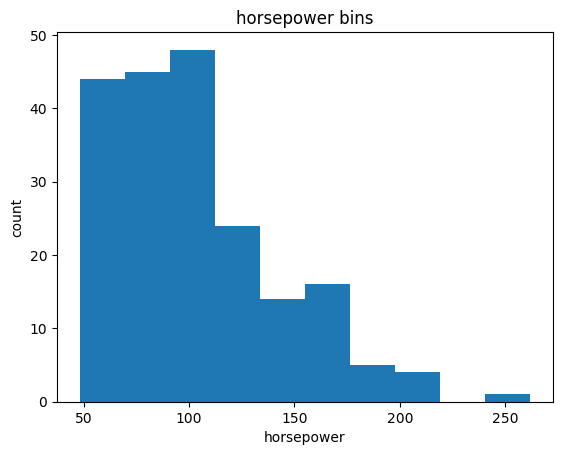

In [102]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['horsepower'])

# setting x/y lables and plot title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

In [106]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins
          

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [109]:
group_names = ['low','medium','high']

In [111]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels= group_names, include_lowest=True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low
5,110,low
6,110,low
7,110,low
8,140,medium
9,101,low


In [112]:
df['horsepower-binned'].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

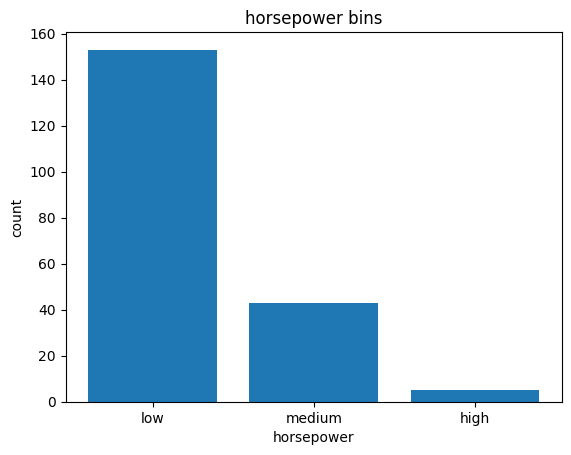

In [114]:
# plotting the distribution

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df['horsepower-binned'].value_counts())

# setting x/y labels and plt title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

Text(0.5, 1.0, 'horsepower')

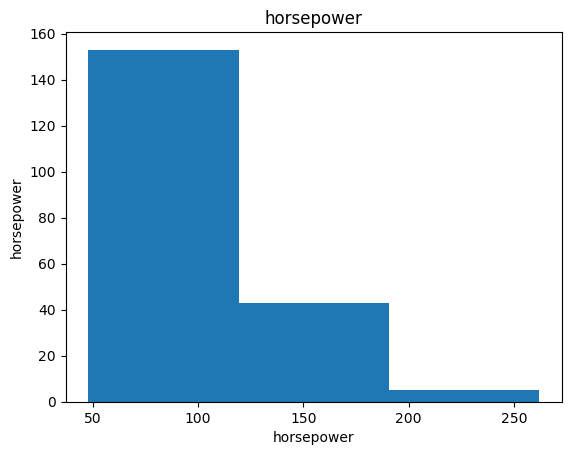

In [117]:
# Normally, a histogram is used to visualize the distribution of bins we created above.

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df['horsepower'], bins = 3)


# setting x/y lables and plot title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('horsepower')
plt.pyplot.title('horsepower')

## Dummy Variables 

In [ ]:
# They are called 'dummies' because the numbers themselves don't have inherent meaning



In [118]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100kn', 'city-L/100km',
       'highway-L/100km', 'horsepower-binned'],
      dtype='object')

In [119]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [121]:
# changing columns names for clarity 
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

In [122]:
# merge data frame 'df' and 'dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis = 1)

#drop origional column 'fuel-type' from df
df.drop('fuel-type', axis = 1, inplace = True)

## Question #4 

In [124]:
# Similar to before, create an indicator/Dummy variable
# for the column "aspiration"

dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.head()


,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [130]:
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace =True)

In [132]:
dummy_variable_2.head()

,aspiration,aspiration
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


## Question #5 

In [141]:
# Merge the new dataframe to the original dataframe, 
# then drop the column 'aspiration'.

df = pd.concat([dummy_variable_2], axis =1)

df.drop('aspiration', axis = 1, inplace =True)

In [142]:
df.head()

""
0
1
2
3
4


In [143]:
df.to_csv('clean_df.csv')